- Begin with a seperate cluster, at each step merge the the two closest clusters

In [37]:
import pandas as pd
import numpy as np
df = pd.read_csv('Grains/seeds.csv', header=None)
df = df.sample(n=50)
samples = df.iloc[:,:-1].to_numpy()
labels = df.iloc[:,-1].to_numpy()-1
label_names = np.array(['Kama wheat', 'Rosa wheat', 'Canadian wheat'])
varieties = label_names[labels]

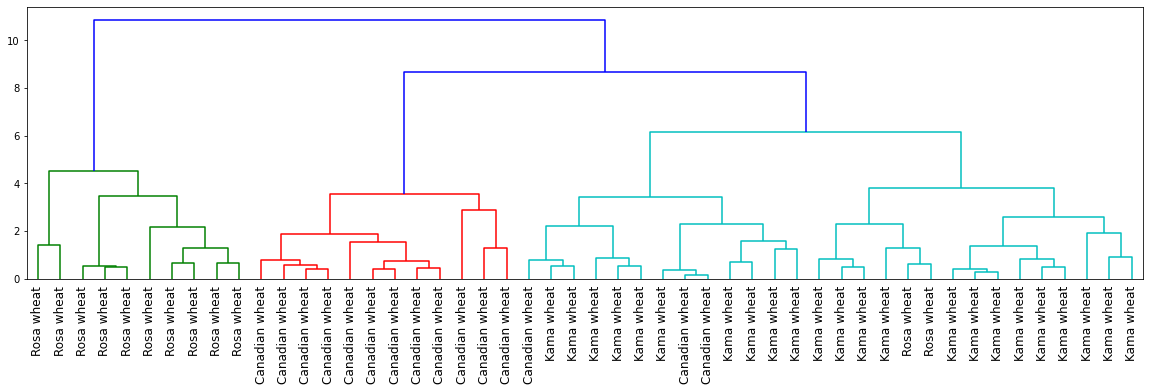

In [38]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
fig, ax = plt.subplots(figsize=(20,5))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=12,
)
fig
plt.show()


### Hierarchical clustering
Several methods of clustering:
- `complete`: farthest elements of each cluster
- `single`: closest elements of each cluster
- Note height of dendrogram is the distance between clusters, the merging point is the distance between them

In [44]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 7, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

[2 1 3 3 1 2 3 3 3 3 1 3 3 3 3 2 2 2 2 1 3 3 3 3 1 2 3 1 3 3 1 3 1 3 3 2 3
 3 3 3 3 1 2 2 3 2 2 1 3 3]
['Canadian wheat' 'Rosa wheat' 'Kama wheat' 'Kama wheat' 'Rosa wheat'
 'Canadian wheat' 'Rosa wheat' 'Kama wheat' 'Canadian wheat'
 'Canadian wheat' 'Rosa wheat' 'Kama wheat' 'Kama wheat' 'Kama wheat'
 'Kama wheat' 'Canadian wheat' 'Canadian wheat' 'Canadian wheat'
 'Canadian wheat' 'Rosa wheat' 'Kama wheat' 'Kama wheat' 'Kama wheat'
 'Kama wheat' 'Rosa wheat' 'Canadian wheat' 'Kama wheat' 'Rosa wheat'
 'Kama wheat' 'Kama wheat' 'Rosa wheat' 'Kama wheat' 'Rosa wheat'
 'Kama wheat' 'Kama wheat' 'Canadian wheat' 'Kama wheat' 'Kama wheat'
 'Kama wheat' 'Kama wheat' 'Rosa wheat' 'Rosa wheat' 'Canadian wheat'
 'Canadian wheat' 'Kama wheat' 'Canadian wheat' 'Canadian wheat'
 'Rosa wheat' 'Kama wheat' 'Canadian wheat']
varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          10
2                      12